# Report Summary (long version) 

##### Say Something

It is a long version of our report, used to summary our ideas, codes and findings. It will be used to make the ppt.      
If you have any suggestions or find any mistakes, don't hesitate to message me. Usually I make it using Jupyter Notebook.       
If you also use Jupyter Notebook, I will send you a copy of it. Otherwise, I usually download it as py and html file.         

*** 

![]()

![](https://grist.files.wordpress.com/2016/03/prontobikes.jpg?w=1200&h=675&crop=1)

![](http://static.seattletimes.com/wp-content/uploads/2016/08/dcc94b60-fdd2-11e5-9ebf-6ed0abf88e2c-1020x680.jpg)

## Overview the dataset: 

### import packages

In [1]:
# basic
import pandas as pd
import numpy as np

# Plotting
%matplotlib inline
get_ipython().magic('matplotlib inline')
import seaborn as sns
import matplotlib.pyplot as plt
from ggplot import *

### read, copy and convert

In [2]:
STATION_DATA = 'data/station.csv'
TRIP_DATA = 'data/trip.csv'
WEATHER_DATA = 'data/weather.csv'

In [3]:
station_df_raw = pd.read_csv(STATION_DATA,
                             parse_dates=["install_date"])
station_df = station_df_raw.copy(deep=True)

In [4]:
weather_df_raw = pd.read_csv(WEATHER_DATA,
                             parse_dates=["Date"])
weather_df = weather_df_raw.copy(deep=True)

weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 21 columns):
Date                          689 non-null datetime64[ns]
Max_Temperature_F             689 non-null int64
Mean_Temperature_F            688 non-null float64
Min_TemperatureF              689 non-null int64
Max_Dew_Point_F               689 non-null int64
MeanDew_Point_F               689 non-null int64
Min_Dewpoint_F                689 non-null int64
Max_Humidity                  689 non-null int64
Mean_Humidity                 689 non-null int64
Min_Humidity                  689 non-null int64
Max_Sea_Level_Pressure_In     689 non-null float64
Mean_Sea_Level_Pressure_In    689 non-null float64
Min_Sea_Level_Pressure_In     689 non-null float64
Max_Visibility_Miles          689 non-null int64
Mean_Visibility_Miles         689 non-null int64
Min_Visibility_Miles          689 non-null int64
Max_Wind_Speed_MPH            689 non-null int64
Mean_Wind_Speed_MPH           689 non-null in

In [5]:
# making sure that starttime and stoptime should be a datatime
trip_df_raw = pd.read_csv(TRIP_DATA,
                          parse_dates=["starttime", "stoptime"])
trip_df = trip_df_raw.copy(deep=True)   # take a deep copy

print("First five rows:\n", trip_df.head())
trip_df.shape

First five rows:
    trip_id           starttime            stoptime    bikeid  tripduration  \
0      431 2014-10-13 10:31:00 2014-10-13 10:48:00  SEA00298       985.935   
1      432 2014-10-13 10:32:00 2014-10-13 10:48:00  SEA00195       926.375   
2      433 2014-10-13 10:33:00 2014-10-13 10:48:00  SEA00486       883.831   
3      434 2014-10-13 10:34:00 2014-10-13 10:48:00  SEA00333       865.937   
4      435 2014-10-13 10:34:00 2014-10-13 10:49:00  SEA00202       923.923   

     from_station_name                                    to_station_name  \
0  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   
1  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   
2  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   
3  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   
4  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   

  from_station_id to_station_id usertype  gender  

(236065, 12)

## Data Cleaning:

### Weather

#### Events

'Rain , Snow' => 'Rain-Snow';    
'Fog , Rain' => 'Fog-Rain';     
'Rain , Thunderstorm' => 'Rain-Thunderstorm';    
nan => 'Sunny'

In [6]:
# data cleaning requried: 'Rain , Snow' => 'Rain-Snow'; 'Fog , Rain' => 'Fog-Rain'; 'Rain ,
# Thunderstorm' => 'Rain-Thunderstorm'
weather_df['Events'] = (weather_df['Events']
                        .fillna('Sunny')
                        .apply(lambda ws: ws.replace(" , ", "-")))

# check:
weather_df.Events.unique()

array(['Rain', 'Sunny', 'Rain-Snow', 'Fog', 'Fog-Rain',
       'Rain-Thunderstorm', 'Snow'], dtype=object)

#### cleaning temperature => make a temperature group

In [7]:
temp_max = weather_df["Mean_Temperature_F"].max()
temp_min = weather_df["Mean_Temperature_F"].min()

print("The max mean temperature is {}.".format(temp_max))
print("The min mean temperature is {}.".format(temp_min))

weather_df["Mean_Temperature_F"] = weather_df["Mean_Temperature_F"].apply(lambda a:
                                                                  "73-83" if 73 <= a <= 83 else
                                                                  "63-73" if 63 <= a <= 72 else
                                                                  "53-63" if 53 <= a <= 62 else
                                                                  "43-53" if 43 <= a <= 52 else
                                                                  "33-43" if 33 <= a <= 42 else
                                                                  "53-63" if np.isnan(a) else a)

weather_df["Mean_Temperature_F"].unique()

The max mean temperature is 83.0.
The min mean temperature is 33.0.


array(['53-63', '63-73', '43-53', '33-43', '73-83'], dtype=object)

#### Max_Gust_Speed_MPH

delete "-", and convert Max_Gust_Speed_MPH to number for comparison

In [8]:
weather_df["Max_Gust_Speed_MPH"] = (weather_df["Max_Gust_Speed_MPH"]
                                    .pipe(pd.to_numeric, errors='coerce'))

# Check
weather_df["Max_Gust_Speed_MPH"].sample(5)

224   NaN
601   NaN
441   NaN
315   NaN
343   NaN
Name: Max_Gust_Speed_MPH, dtype: float64

### Trip:

#### trip: clean tripduration:

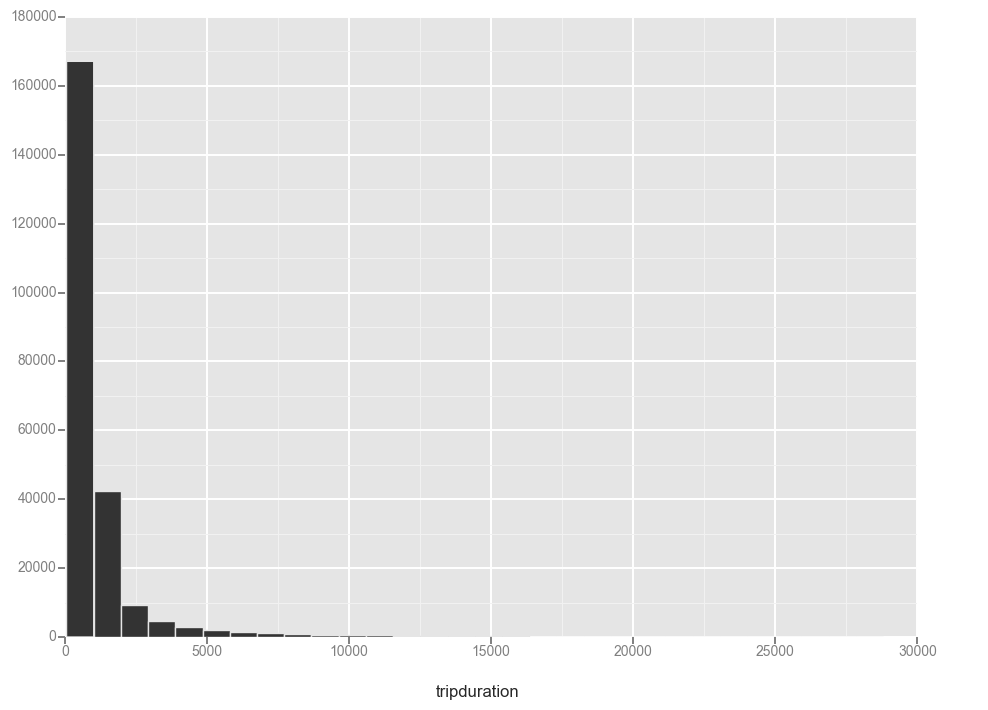

<ggplot: (-9223371851133425548)>

In [9]:
# identifying the outliers

trip_df_outlier = trip_df_raw.copy(deep=True)  # take a deep copy

# print("First five rows:\n", trip_df_outlier.head())

# EDA (Exploratory Data Analysis)
trip_dur_rg = trip_df_outlier[['tripduration']].apply(np.ptp)
ggplot(aes(x='tripduration'), data=trip_df_outlier) + \
geom_histogram(binwidth=trip_dur_rg / 30)

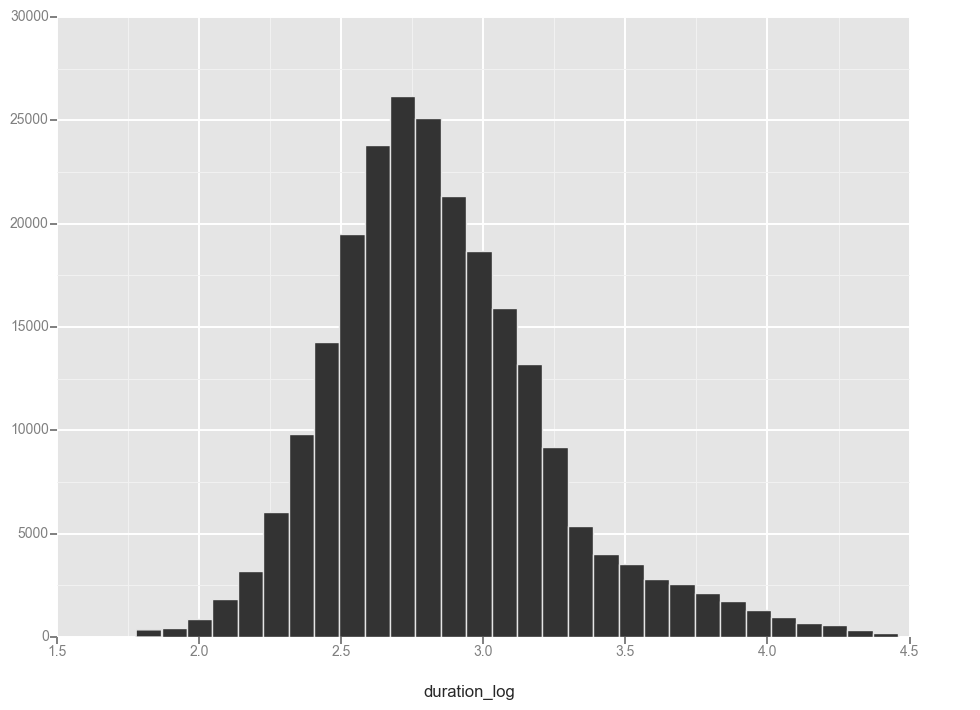

<ggplot: (-9223371851131637360)>

In [10]:
# The data is strongly skewed to the right! Let's normalize it!

trip_df_outlier['duration_log'] = trip_df_outlier[['tripduration']].apply(np.log10)
trip_log_dur_rg = trip_df_outlier[['duration_log']].apply(np.ptp)

ggplot(aes(x='duration_log'), data=trip_df_outlier) + \
geom_histogram(binwidth=trip_log_dur_rg / 30)

In [11]:
def get_rid_of_outlier(df):
    df_summary = df.describe()["duration_log"]
    q3 = df_summary['75%']
    q1 = df_summary['25%']
    df_iqr = df_summary['75%'] - df_summary['25%']
    return {"lower": q1 - 1.5 * df_iqr, "upper": q3 + 1.5 * df_iqr}


trip_df_bdry = get_rid_of_outlier(trip_df_outlier[['duration_log']])

trip_df = (trip_df_outlier
           [trip_df_bdry['lower'] < trip_df_outlier['duration_log']]
           [trip_df_outlier['duration_log'] < trip_df_bdry['upper']]).reset_index()

print("After the removal of outliers, the trip dataframe downsized from {} to {}."
      .format(trip_df_outlier.shape, trip_df.shape))

After the removal of outliers, the trip dataframe downsized from (236065, 13) to (227954, 14).


E:\Programming\Python\Anaconda3\envs\py35\lib\site-packages\ipykernel\__main__.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [38]:
trip_df["duration_sec"] = trip_df["tripduration"]
trip_df["duration_min"] = trip_df["duration_sec"].apply(lambda s: round(s / 60, 2))

# trip_df.sample(5)
trip_df.shape

(227954, 28)

#### trip: Cleaning for datetime:

In [13]:
# Check the data and data type
print(trip_df['starttime'][0])
print(type(trip_df['starttime'][0]))

WEEKDAY_MAP = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"}

# dir(trip_df['starttime'][0])   see what I can do with it

# create a couple cols that will be used in the data visualization later
trip_df["start_hour"] = trip_df['starttime'].apply(lambda dt: dt.hour)
trip_df['starttime'].apply(lambda dt: dt.day)
trip_df["start_weekday"] = (trip_df['starttime']
                            .apply(lambda dt: dt.weekday())
                            .apply(lambda wdint: WEEKDAY_MAP[wdint]))
trip_df["start_month"] = trip_df['starttime'].apply(lambda dt: dt.month)
trip_df['start_year'] = trip_df['starttime'].apply(lambda dt: dt.year)
trip_df["stop_hour"] = trip_df['stoptime'].apply(lambda dt: dt.hour)
trip_df['stoptime'].apply(lambda dt: dt.day)
trip_df["stop_weekday"] = (trip_df['stoptime']
                           .apply(lambda dt: dt.weekday())
                           .apply(lambda wdint: WEEKDAY_MAP[wdint]))
trip_df["stop_month"] = trip_df['stoptime'].apply(lambda dt: dt.month)
trip_df['stop_year'] = trip_df['stoptime'].apply(lambda dt: dt.year)

# check:
trip_df.sample(5)

2014-10-13 10:31:00
<class 'pandas.tslib.Timestamp'>


,index,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,...,duration_sec,duration_min,start_hour,start_weekday,start_month,start_year,stop_hour,stop_weekday,stop_month,stop_year
155087,160357,175288,2015-12-31 08:47:00,2015-12-31 08:51:00,SEA00181,253.760,Frye Art Museum / Terry Ave & Columbia St,2nd Ave & Spring St,FH-01,CBD-06,...,253.760,4.23,8,Thu,12,2015,8,Thu,12,2015
193472,200060,217579,2016-06-06 09:58:00,2016-06-06 10:17:00,SEA00169,1101.228,Summit Ave E & E Republican St,Occidental Park / Occidental Ave S & S Washing...,CH-03,PS-04,...,1101.228,18.35,9,Mon,6,2016,10,Mon,6,2016
201962,208894,226889,2016-06-29 15:17:00,2016-06-29 16:17:00,SEA00423,3608.868,2nd Ave & Spring St,2nd Ave & Pine St,CBD-06,CBD-13,...,3608.868,60.15,15,Wed,6,2016,16,Wed,6,2016
117739,122064,134811,2015-08-25 06:44:00,2015-08-25 06:49:00,SEA00270,310.038,3rd Ave & Broad St,6th Ave & Blanchard St,BT-01,BT-04,...,310.038,5.17,6,Tue,8,2015,6,Tue,8,2015
167371,172925,188519,2016-03-08 09:02:00,2016-03-08 09:17:00,SEA00387,921.619,E Harrison St & Broadway Ave E,6th Ave S & S King St,CH-02,ID-04,...,921.619,15.36,9,Tue,3,2016,9,Tue,3,2016


#### trip: clean birthyear:

In [14]:
AGE_GROUP = {0: "Under 18", 1: "18-24", 2: "25-34", 3: "35-44",
             4: "45-54", 5: "55-64", 6: "65-74", 7: "Over 75"}

trip_df["user_age"] = (trip_df["start_year"] - trip_df["birthyear"])

trip_df["user_age"].apply(lambda a:
                          0 if a < 18 else
                          1 if 18 <= a <= 24 else
                          2 if 25 <= a <= 34 else
                          3 if 35 <= a <= 44 else
                          4 if 45 <= a <= 54 else
                          5 if 55 <= a <= 64 else
                          6 if 65 <= a <= 74 else
                          7 if a >= 75 else a
                          ).apply(lambda i: AGE_GROUP.get(i)
if AGE_GROUP.get(i) else i)

trip_df["user_age"].sample(5)

0         54.0
1         44.0
2         26.0
3         37.0
4         43.0
5         40.0
6         36.0
7         31.0
8         40.0
9         56.0
10        31.0
11        32.0
12        30.0
13        59.0
14        61.0
15        56.0
16        55.0
17        64.0
18        38.0
19        28.0
20        61.0
21        28.0
22        47.0
23        28.0
24        27.0
25        27.0
26        40.0
27        47.0
28        31.0
29        44.0
          ... 
227924     NaN
227925     NaN
227926     NaN
227927     NaN
227928     NaN
227929     NaN
227930    38.0
227931    28.0
227932    31.0
227933    21.0
227934     NaN
227935     NaN
227936    29.0
227937    22.0
227938    35.0
227939    40.0
227940    27.0
227941    42.0
227942    35.0
227943     NaN
227944    32.0
227945    26.0
227946     NaN
227947     NaN
227948     NaN
227949     NaN
227950     NaN
227951     NaN
227952     NaN
227953     NaN
Name: user_age, dtype: float64

#### cleaning station name:

Burke Museum / E Stevens Way NE & Memorial Way NE  => E Harrison St & Broadway Ave E      
It eliminates the risk of confusion in the latter data manipulation. 

In [15]:
def station_name_to_alias(station_name):
    alias_name = station_name.split(" / ")
    return alias_name[0] if len(alias_name) > 1 else None


def simplify_station_name(station_name):
    alias_name = station_name.split(" / ")
    return alias_name[1] if len(alias_name) > 1 else alias_name[0]

trip_df['from_station_alias'] = (trip_df['from_station_name']
                                 .apply(station_name_to_alias))
trip_df['to_station_alias'] = (trip_df['to_station_name']
                               .apply(station_name_to_alias))
trip_df['from_station_name'] = (trip_df['from_station_name']
                                .apply(simplify_station_name))
trip_df['to_station_name'] = (trip_df['to_station_name']
                              .apply(simplify_station_name))


In [16]:
# trip_df.sample(5)

### Station:

In [17]:
# nothing

## Merging the dataframes: 

### merge trip_df and weather_df => trip_weather_df

In [18]:
trip_df.merge(weather_df, how='left', left_on='starttime', right_on='Date')

trip_df["start_date"] = (trip_df["starttime"]
                         .apply(lambda dt: dt.date()))
weather_df["Date"] = (weather_df["Date"]
                      .apply(lambda dt: dt.date()))

trip_weather_df = trip_df.merge(weather_df, how='left', left_on='start_date', right_on='Date')

In [19]:
# check: 
# print(trip_weather_df.shape)
# print(trip_weather_df.columns)

### merge trip_weather_df and station_df => cycle_df

In [20]:
station_from_df = (station_df
                   .rename(columns={old_name: "from_" + old_name
                                    for old_name in station_df.columns}))

station_to_df = (station_df
                 .rename(columns={old_name: "to_" + old_name
                                  for old_name in station_df.columns}))

trip_weather_df.head()

cycle_df = (trip_weather_df
            .merge(station_from_df, how='left', on='from_station_id')
            .merge(station_to_df, how='left', on='to_station_id'))

In [46]:
# check: 
print(cycle_df.shape)
print(cycle_df.columns)

(227954, 65)
Index(['index', 'trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_name', 'to_station_name', 'from_station_id',
       'to_station_id', 'usertype', 'gender', 'birthyear', 'duration_log',
       'duration_sec', 'duration_min', 'start_hour', 'start_weekday',
       'start_month', 'start_year', 'stop_hour', 'stop_weekday', 'stop_month',
       'stop_year', 'user_age', 'from_station_alias', 'to_station_alias',
       'start_date', 'Date', 'Max_Temperature_F', 'Mean_Temperature_F',
       'Min_TemperatureF', 'Max_Dew_Point_F', 'MeanDew_Point_F',
       'Min_Dewpoint_F', 'Max_Humidity', 'Mean_Humidity', 'Min_Humidity',
       'Max_Sea_Level_Pressure_In', 'Mean_Sea_Level_Pressure_In',
       'Min_Sea_Level_Pressure_In', 'Max_Visibility_Miles',
       'Mean_Visibility_Miles', 'Min_Visibility_Miles', 'Max_Wind_Speed_MPH',
       'Mean_Wind_Speed_MPH', 'Max_Gust_Speed_MPH', 'Precipitation_In',
       'Events', 'from_name', 'from_lat', 'from_long', 'fr

,index,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,...,from_current_dockcount,from_decommission_date,to_name,to_lat,to_long,to_install_date,to_install_dockcount,to_modification_date,to_current_dockcount,to_decommission_date
0,0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,985.935,2nd Ave & Spring St,Occidental Ave S & S Washington St,CBD-06,PS-04,...,18.0,NaN,Occidental Park / Occidental Ave S & S Washing...,47.600757,-122.332946,2014-10-13,18.0,NaN,18.0,NaN
1,1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,926.375,2nd Ave & Spring St,Occidental Ave S & S Washington St,CBD-06,PS-04,...,18.0,NaN,Occidental Park / Occidental Ave S & S Washing...,47.600757,-122.332946,2014-10-13,18.0,NaN,18.0,NaN
2,2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,883.831,2nd Ave & Spring St,Occidental Ave S & S Washington St,CBD-06,PS-04,...,18.0,NaN,Occidental Park / Occidental Ave S & S Washing...,47.600757,-122.332946,2014-10-13,18.0,NaN,18.0,NaN
3,3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,865.937,2nd Ave & Spring St,Occidental Ave S & S Washington St,CBD-06,PS-04,...,18.0,NaN,Occidental Park / Occidental Ave S & S Washing...,47.600757,-122.332946,2014-10-13,18.0,NaN,18.0,NaN
4,4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,923.923,2nd Ave & Spring St,Occidental Ave S & S Washington St,CBD-06,PS-04,...,18.0,NaN,Occidental Park / Occidental Ave S & S Washing...,47.600757,-122.332946,2014-10-13,18.0,NaN,18.0,NaN


## Research Questions: Just an example

### 1. How does weather affect the trip duration ?

#### 1. The distribution of events: 

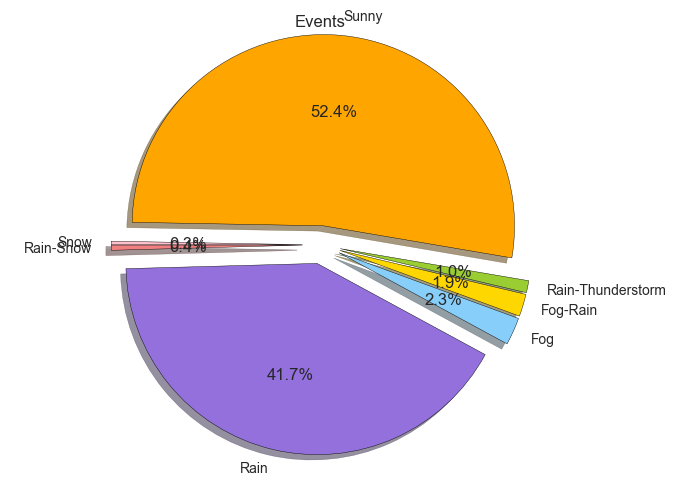

In [22]:
ct_events = dict(weather_df
                 .groupby(weather_df.Events)['Date']
                 .count())
# draw a pie chart
#('Snow', 'Fog', 'Sunny', 'Rain-Thunderstorm', 'Rain', 'Fog-Rain', 'Rain-Snow')

labels = tuple(ct_events.keys())

sizes = list(ct_events.values())

colors = ['lightcoral', 'mediumpurple', 'lightskyblue', 'gold',
          'yellowgreen', 'orange', 'pink']

explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  # proportion with which to offset each wedge

plt.pie(sizes,
        explode=explode,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        shadow=True,
        startangle=180)
plt.axis('equal')
plt.title('Events')

plt.show()

#### 2. What is the relationship between events and number of riders? 

In [23]:
n_cycle = cycle_df.shape[0]
pct_ct_trip_events = (cycle_df
                      .groupby('Events')['trip_id']
                      .count() / n_cycle)

n_weather = weather_df.shape[0]
pct_ct_events = (weather_df
                 .groupby('Events')['Date']
                 .count() / n_weather)

pct_rider_events = dict(pct_ct_trip_events - pct_ct_events)

print(pct_ct_trip_events)
print(pct_ct_events)
print(pct_rider_events)

Events
Fog                  0.018903
Fog-Rain             0.014643
Rain                 0.320258
Rain-Snow            0.001377
Rain-Thunderstorm    0.010213
Snow                 0.001957
Sunny                0.632650
Name: trip_id, dtype: float64
Events
Fog                  0.023222
Fog-Rain             0.018868
Rain                 0.416546
Rain-Snow            0.004354
Rain-Thunderstorm    0.010160
Snow                 0.002903
Sunny                0.523948
Name: Date, dtype: float64
{'Rain-Snow': -0.002976665536357735, 'Rain': -0.096288122601773107, 'Fog': -0.0043191244005344048, 'Fog-Rain': -0.0042246193000540812, 'Rain-Thunderstorm': 5.293508087269444e-05, 'Sunny': 0.10870181928717237, 'Snow': -0.00094622252932577379}


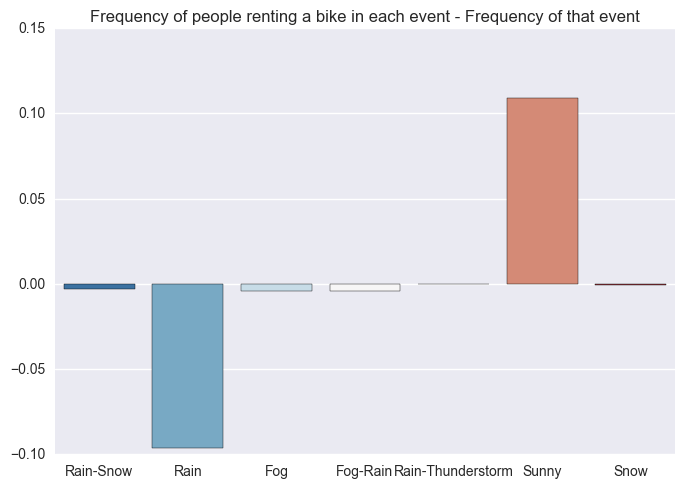

In [24]:
minus_plot = sns.barplot(tuple(pct_rider_events.keys()), list(pct_rider_events.values()),
                         palette="RdBu_r")
sns.despine(bottom=True)

minus_plot.set_title('Frequency of people renting a bike in each event - Frequency of that event')
plt.show()

In a sunny day, people are more likely to rent a bike. In a rainy day, people are less likely to rent a bike to commute. However, the difference between the frequency of people renting a bike in each event and the frequency of that event is only around 10% for both sunny day and rainy day. We can see that raining or not is not the critical factor. 

![Seattle](http://1.bp.blogspot.com/-_j8kHhzKeHM/UL1_DpqN8NI/AAAAAAAAMKQ/BGvRVwmgmAM/s1600/tumblr_m66m4ryYrg1qd6wxeo1_500.jpg)

#### 3. What is the relationship between events and trip duration? 

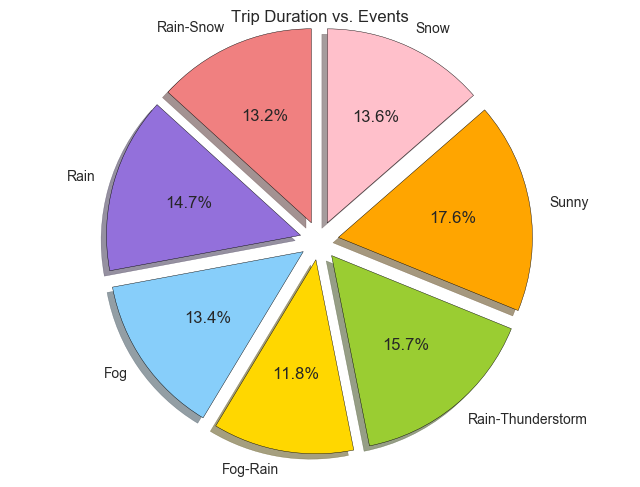

In [25]:
avg_trip_duration = dict(cycle_df
                         .groupby('Events')['tripduration']
                         .mean())
# draw a pie chart
# ('Snow', 'Fog', 'Sunny', 'Rain-Thunderstorm', 'Rain', 'Fog-Rain', 'Rain-Snow')

labels = tuple(avg_trip_duration.keys())

sizes = list(avg_trip_duration.values())

colors = ['lightcoral', 'mediumpurple', 'lightskyblue', 'gold',
          'yellowgreen', 'orange', 'pink']

explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  # proportion with which to offset each wedge

plt.pie(sizes,
        explode=explode,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        shadow=True,
        startangle=90)
plt.axis('equal')
plt.title('Trip Duration vs. Events')

plt.show()

The pie chart shows that people enjoy riding a bike in a sunny day. 

#### 4. How does the wind speed affect the trip duration/ number of riders? 

In [26]:
# How many days that the mean wind speed exceed 18? It is said that over 18 is not safe for cycling.
wind_speed_danger = cycle_df["Mean_Wind_Speed_MPH"] > 18
print("There are {} days with danger wind speed."
      .format(cycle_df["Mean_Wind_Speed_MPH"][wind_speed_danger].count())) 

# What about Max_Gust_Speed_MPH over 25?
gust_speed_danger = cycle_df["Max_Gust_Speed_MPH"] > 25
print("There are {} days with Max_Gust_Speed_MPH over 25."
      .format(cycle_df["Max_Gust_Speed_MPH"][gust_speed_danger].count()))

# I define the days that has Max_Gust_Speed_MPH larger than 25/mph and Mean_Wind_Speed_MPH over 12/mph as windy day.
wind_speed_bad = cycle_df["Mean_Wind_Speed_MPH"] > 12
print("There are {} days with mean wind speed over 12.".format(weather_df["Max_Gust_Speed_MPH"][gust_speed_danger][wind_speed_bad].count()))

windy_day = cycle_df['Date'][gust_speed_danger & wind_speed_bad]

There are 106 days with danger wind speed.
There are 12906 days with Max_Gust_Speed_MPH over 25.
There are 0 days with mean wind speed over 12.


In [27]:
windy_day.groupby(cycle_df['Date']).count().mean()

152.625

#### 5. How does the Temp_Group affect the trip duration/ number of riders?

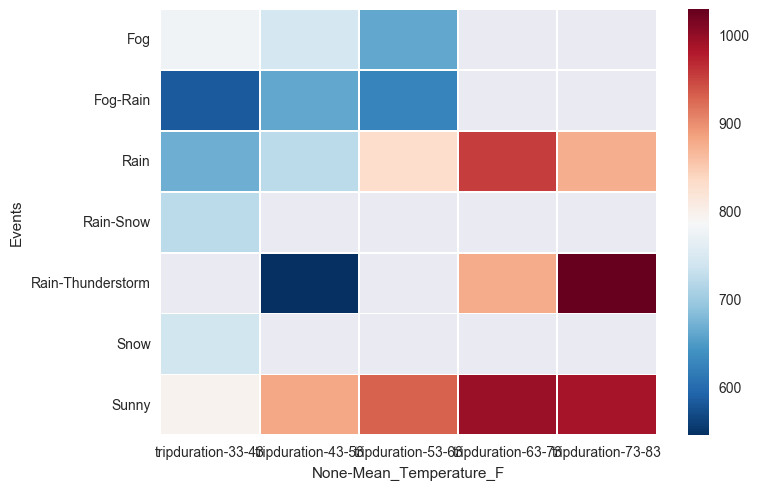

In [28]:
# Heatmap:
cycle_df_heat = cycle_df[['Events', 'tripduration', "Mean_Temperature_F"]]
cycle_df_heat = cycle_df_heat.groupby(['Events', "Mean_Temperature_F"]).mean().unstack()

df_try_heatmap = sns.heatmap(cycle_df_heat, linewidths=.5, cmap="RdBu_r")

### 2. How does time affect the number of riders ?

#### 1. How does the trip duration and number of riders varied by time?

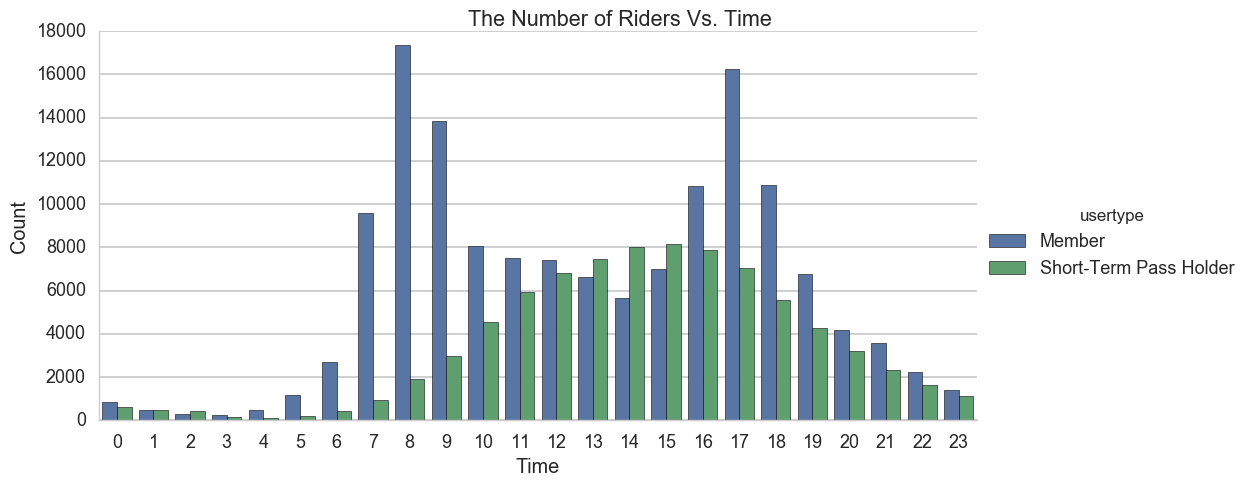

In [42]:
sns.set(style="whitegrid")

# Make a range of years to show categories with no observations
years = np.arange(0, 24)

# Draw a count plot to show the number of planets discovered each year
sns.set_context("talk")
hour_plot = sns.factorplot(x="start_hour", data=trip_df, kind="count",
                           size=5, aspect=2, order=years, hue="usertype"
                           )
hour_plot.set_xticklabels(step=1)
hour_plot.set_axis_labels('Time', 'Count')
hour_plot.fig.suptitle('The Number of Riders Vs. Time')

From the factor plot, we can see that it has two peaks: 8 am and 5 pm. It indicates that the most people rent a bike to commute to work. 

#### 2. How does the trip duration and number of riders varied by day of the week? 

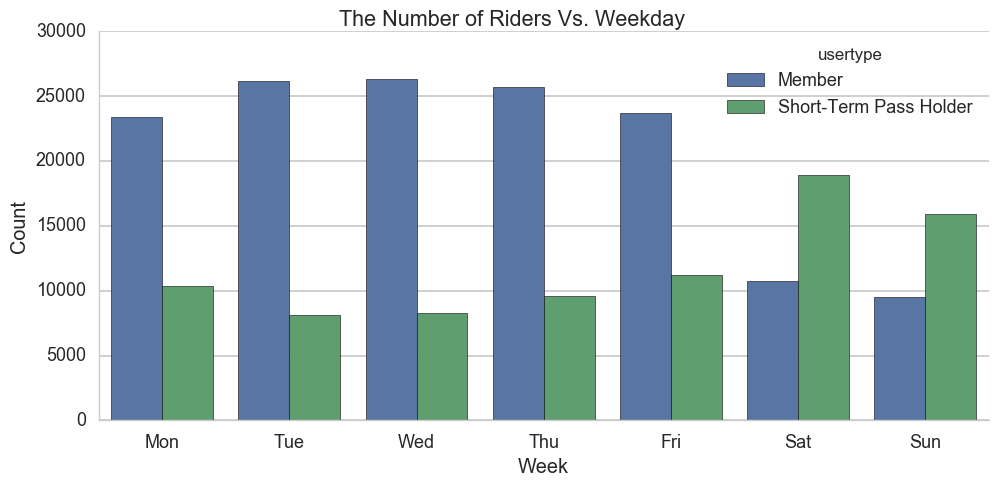

In [39]:
sns.set(style="whitegrid")

# Make a range of years to show categories with no observations
WEEKDAYS = WEEKDAY_MAP.values()

trip_df.columns

# Draw a count plot to show the number of planets discovered each year
sns.set_context("talk")
weekday_plot = sns.factorplot(x="start_weekday", data=trip_df, kind="count",
                              size=5, aspect=2, order=WEEKDAYS, hue="usertype",
                              legend_out=False)
weekday_plot.set_xticklabels(step=1)
weekday_plot.set_axis_labels('Week', 'Count')
weekday_plot.fig.suptitle('The Number of Riders Vs. Weekday')

#### 3. How does number of riders varied by month?

In [31]:
trip_df[trip_df['start_year']==2015].head()
trip_df['start_year'].unique()

array([2014, 2015, 2016], dtype=int64)

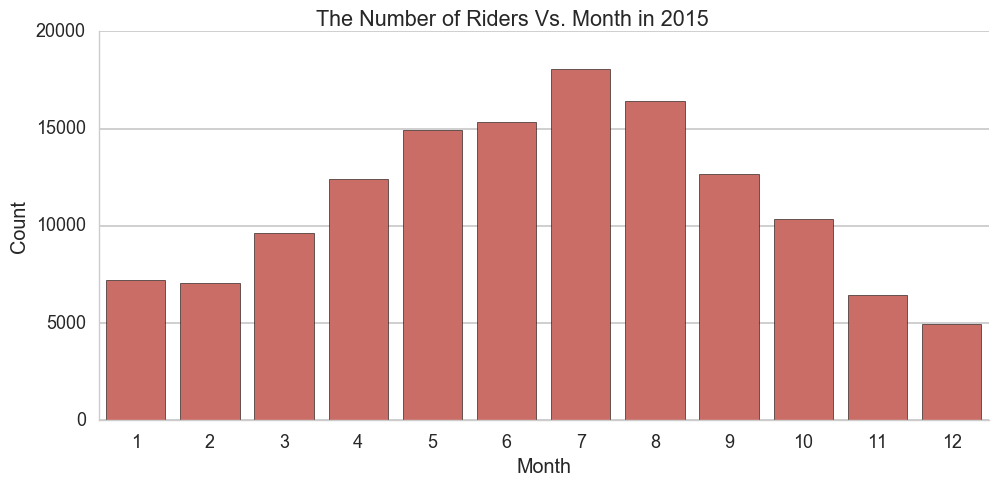

In [32]:
sns.set(style="whitegrid")

# Make a range of years to show categories with no observations
MONTHS = np.arange(1, 13)

# Draw a count plot to show the number of planets discovered each year
sns.set_context("talk")
month_plot = sns.factorplot(x="start_month", data=trip_df[trip_df['start_year'] == 2015],
                            kind="count",
                            palette=sns.color_palette("hls", 1),
                            size=5, aspect=2, order=MONTHS)
month_plot.set_xticklabels(step=1)
month_plot.set_axis_labels('Month', 'Count')
month_plot.fig.suptitle('The Number of Riders Vs. Month in 2015')

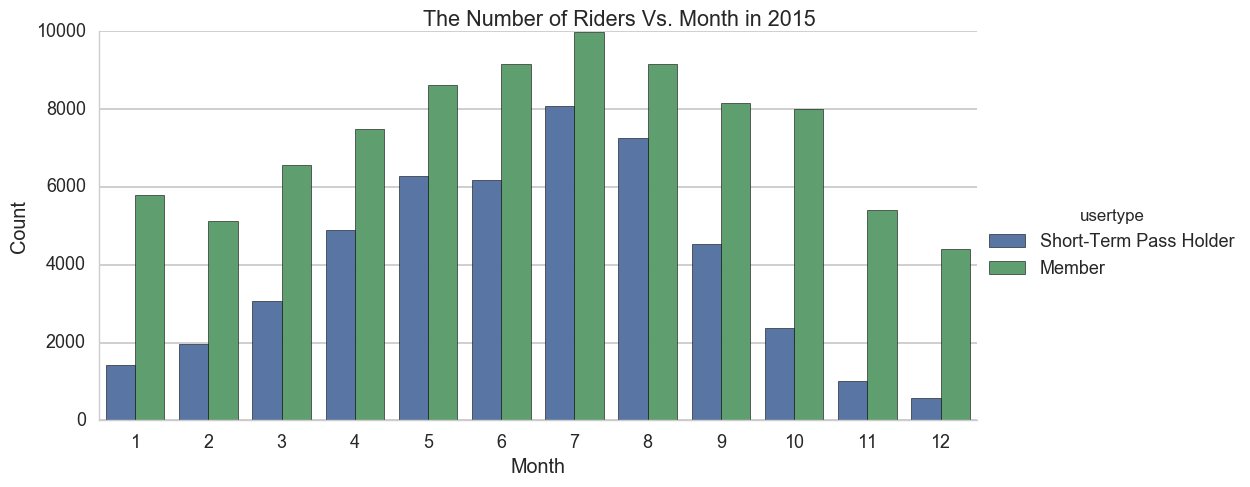

In [45]:
sns.set(style="whitegrid")

# Make a range of years to show categories with no observations
MONTHS = np.arange(1, 13)

# Draw a count plot to show the number of planets discovered each year
sns.set_context("talk")
month_plot = sns.factorplot(x="start_month", data=trip_df[trip_df['start_year'] == 2015],
                            kind="count",
                            size=5, aspect=2, order=MONTHS, hue="usertype"
                            )
month_plot.set_xticklabels(step=1)
month_plot.set_axis_labels('Month', 'Count')
month_plot.fig.suptitle('The Number of Riders Vs. Month in 2015')

an approximately normal distribution. 
The above graph indicates that people enjoy cycling during the warm month. 
Also, Seattle's rainy season begins September and ends on April. 

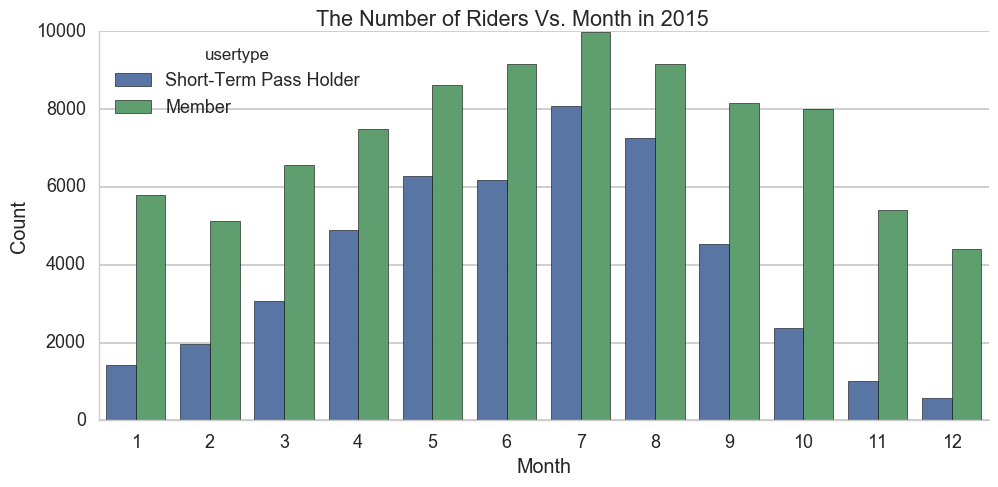

In [34]:
# Make a range of years to show categories with no observations
MONTHS = np.arange(1, 13)

# Draw a count plot to show the number of planets discovered each year
sns.set_context("talk")
month_plot = sns.factorplot(x="start_month", data=trip_df[trip_df['start_year'] == 2015],
                            kind="count",
                            size=5, aspect=2, order=MONTHS, hue="usertype",
                            legend_out=False)
month_plot.set_xticklabels(step=1)
month_plot.set_axis_labels('Month', 'Count')
month_plot.fig.suptitle('The Number of Riders Vs. Month in 2015')

In [35]:
# cycle_df[trip_df['start_year'] == 2015].groupby([cycle_df["start_month"], cycle_df['usertype']]).describe()

In [36]:
month_usertype_count = (cycle_df['index'][trip_df['start_year'] == 2015]
                        .groupby([cycle_df["start_month"], cycle_df['usertype']])
                        .count())

month_count = (cycle_df['index'][trip_df['start_year'] == 2015]
                        .groupby(cycle_df["start_month"])
                        .count())
# list(month_usertype_count.values())
# np.array(month_usertype_count.values())

print(month_usertype_count)
print(month_count)

print("The standard deviation of month in 2015 is {}".format(np.std(month_usertype_count)))
print("The standard deviation of month and usertype in 2015 is {}".format(np.std(month_count)))

start_month  usertype              
1            Member                    5792
             Short-Term Pass Holder    1425
2            Member                    5115
             Short-Term Pass Holder    1964
3            Member                    6556
             Short-Term Pass Holder    3078
4            Member                    7498
             Short-Term Pass Holder    4899
5            Member                    8630
             Short-Term Pass Holder    6286
6            Member                    9151
             Short-Term Pass Holder    6186
7            Member                    9992
             Short-Term Pass Holder    8076
8            Member                    9168
             Short-Term Pass Holder    7267
9            Member                    8160
             Short-Term Pass Holder    4522
10           Member                    8008
             Short-Term Pass Holder    2365
11           Member                    5405
             Short-Term Pass Holder    1

### 3. Other Visualizations

In [37]:
# todo 2. draw distance network plot
cycle_df.columns
DP_COLS = ['from_station_name', 'to_station_name', 'from_station_id', 'to_station_id',
           'from_lat', 'from_long', 'to_lat', 'to_long']
cycle_df.to_csv("data/dnplot.csv", columns=DP_COLS, index=False)

### [Interactive Map](https://miercat.shinyapps.io/python-finalproject/)

## Conclusion: 

- summary of our finding (we all write something on the findings~)

- Suggestions for Future Analysis